In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [2]:
county = ['Nevada', 'Placer', 'El Dorado']

In [3]:
with open('./data/weather_stations.json', 'r') as f:
    data = json.load(f)
    
data_matrix = []
for station in data['station_current']['STATION']:
    data_matrix.append([station['NAME'], float(station['ELEVATION']), station['STATUS'], station['SOURCE']])
    
station_df = pd.DataFrame(data_matrix, columns=['name', 'elevation', 'status', 'source'])
sierra_stations = set(station_df[station_df['source'] == 'snotel'].name)
print(sierra_stations)

{'Marlette Lake', 'Palisades Tahoe', 'Independence Creek', 'Tahoe City Cross', 'Css Lab', 'Mt Rose Ski Area', 'Blue Lakes', 'Independence Lake', 'Heavenly Valley', 'Independence Camp', 'Ward Creek #3', 'Echo Peak', 'Forestdale Creek', 'Big Meadow', 'Horse Meadow', 'Burnside Lake', 'Little Valley', 'Carson Pass', 'Ebbetts Pass', 'Hagans Meadow', 'Rubicon #2'}


In [4]:
# data.csv, 95
# data2.csv, 122
# data3.csv, 194
full_df = pd.read_csv('./data/data3.csv', skiprows=194)
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df = full_df.set_index('Date')

In [5]:
ca_stations = set(full_df['Station Name'])
print(ca_stations)

{'Palisades Tahoe', 'Summit Meadow', 'Independence Creek', 'Robinson Cow Camp', 'Kettle Rock', 'Lake Lois', 'Tahoe City Cross', 'Forni Ridge', 'Silver Lake', 'Css Lab', 'Grizzly Ridge', 'Schneiders', 'Harkness Flat', 'Van Vleck', 'Blue Lakes', 'Independence Lake', 'Alpha', 'Heavenly Valley', 'Highland Meadow', 'Pilot Peak', 'Meadow Lake', 'Truckee #2', 'Monitor Pass', 'Bloods Creek', 'Huysink', 'Independence Camp', 'Gold Lake', 'Spratt Creek', 'Blue Canyon', 'Rattlesnake', 'Bucks Lake', 'Ward Creek #3', 'Echo Peak', 'Four Trees', 'Forestdale Creek', 'Greek Store', 'Humbug', 'Stanislaus Meadow', 'Robbs Saddle', 'Robbs Powerhouse', 'Poison Flat', 'Horse Meadow', 'Burnside Lake', 'Fallen Leaf', 'Carson Pass', 'Ebbetts Pass', 'Hagans Meadow', 'Caples Lake', 'Rubicon #2'}


In [38]:
stations_missing = sierra_stations - ca_stations
print(stations_missing)

{'Marlette Lake', 'Big Meadow', 'Little Valley', 'Mt Rose Ski Area'}


In [7]:
full_df.head()

,Station Name,Station Id,Network Name,Elevation (ft),County Name,Snow Water Equivalent (mm) Start of Day Values,Snow Depth (cm) Start of Day Values,Precipitation Increment (mm),Air Temperature Average (degC),Wind Direction Average (degree),Wind Speed Average (km/hr),Precipitation Accumulation (mm) Start of Day Values,Change In Precipitation Accumulation (mm)
Date,,,,,,,,,,,,,
2005-07-22,Alpha,ALP,COOPERATOR SNOW SENSORS,7600,El Dorado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-23,Alpha,ALP,COOPERATOR SNOW SENSORS,7600,El Dorado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-24,Alpha,ALP,COOPERATOR SNOW SENSORS,7600,El Dorado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-25,Alpha,ALP,COOPERATOR SNOW SENSORS,7600,El Dorado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-26,Alpha,ALP,COOPERATOR SNOW SENSORS,7600,El Dorado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
values = ['below', 'at', 'above']
conditions = (
    (full_df['Elevation (ft)'] <= 7000),
    (full_df['Elevation (ft)'] > 7000) & (full_df['Elevation (ft)'] <= 10000),
    (full_df['Elevation (ft)'] > 10000),
)
full_df['treeline'] = np.select(conditions, values)

<AxesSubplot:xlabel='treeline'>

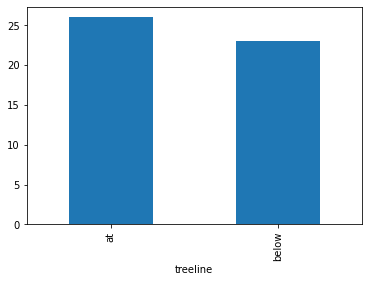

In [9]:
full_df.groupby('treeline')['Station Name'].nunique().plot.bar()

In [10]:
full_df.columns

Index(['Station Name', 'Station Id', 'Network Name', 'Elevation (ft)',
       'County Name', 'Snow Water Equivalent (mm) Start of Day Values',
       'Snow Depth (cm) Start of Day Values', 'Precipitation Increment (mm)',
       'Air Temperature Average (degC)', 'Wind Direction Average (degree)',
       'Wind Speed Average (km/hr)',
       'Precipitation Accumulation (mm) Start of Day Values',
       'Change In Precipitation Accumulation (mm)', 'treeline'],
      dtype='object')

In [22]:
def get_value_df(station_df, value):
    _df = station_df.pivot(columns='Station Id', values=value).dropna(axis=1, how='all')
    _df['average'] = _df.mean(numeric_only=True, axis=1)
    return _df

condition = lambda x: ('(' not in x) and (')' not in x) and (x != 'Station Id')
to_drop = [col for col in full_df.columns if condition(col)] + ['Elevation (ft)']

station_df = full_df[full_df['treeline'] == 'at'].drop(
    to_drop,
    axis=1
)

dfs = {key: get_value_df(station_df, key) for key in station_df.columns if key != 'Station Id'}

avg_df = pd.DataFrame({key: df.average for key, df in dfs.items() if key != 'Station Id'})

In [23]:
avg_df.head()

,Snow Water Equivalent (mm) Start of Day Values,Snow Depth (cm) Start of Day Values,Precipitation Increment (mm),Air Temperature Average (degC),Wind Direction Average (degree),Wind Speed Average (km/hr),Precipitation Accumulation (mm) Start of Day Values,Change In Precipitation Accumulation (mm)
Date,,,,,,,,
2005-04-01,1109.20,252.200000,0.733333,4.000000,NaN,NaN,970.000000,3.200000
2005-04-02,1108.52,246.066667,0.400000,2.273333,NaN,NaN,970.666667,0.666667
2005-04-03,1107.68,242.066667,11.533333,-2.693333,NaN,NaN,971.000000,0.333333
2005-04-04,1122.08,256.200000,4.933333,-3.140000,NaN,NaN,982.400000,11.400000
2005-04-05,1122.88,249.066667,4.133333,4.206667,NaN,NaN,987.333333,4.933333


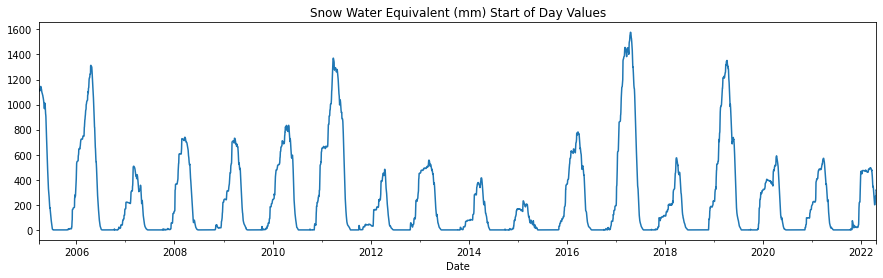

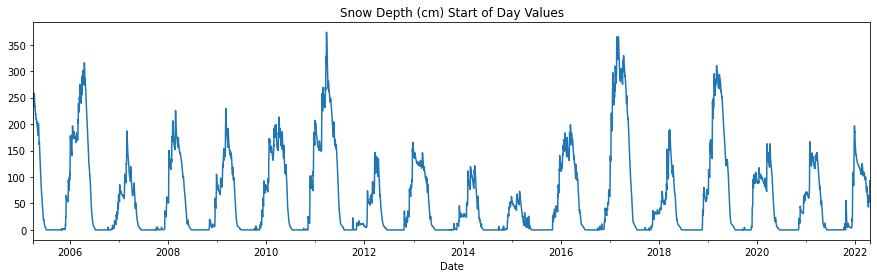

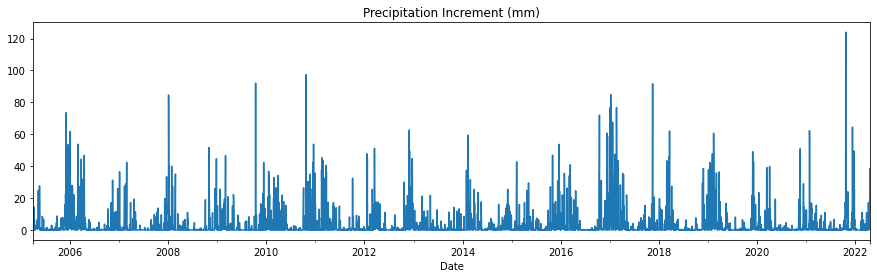

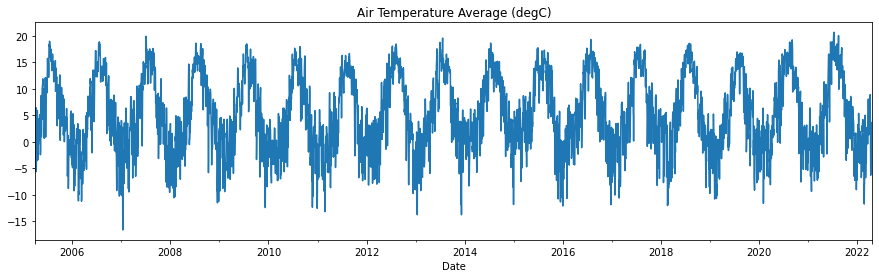

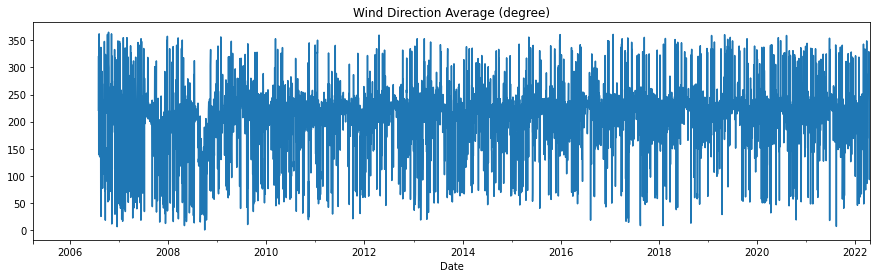

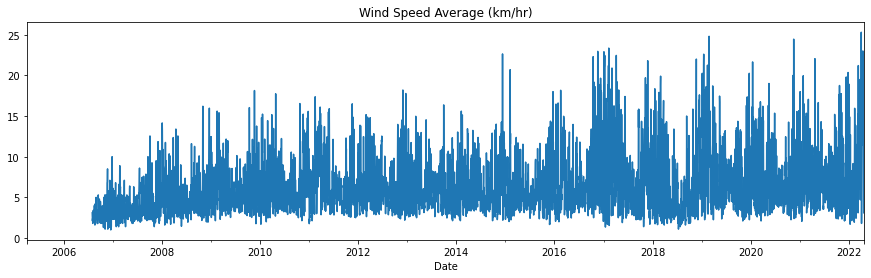

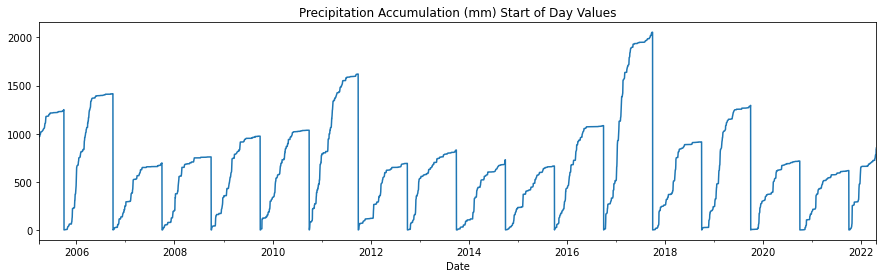

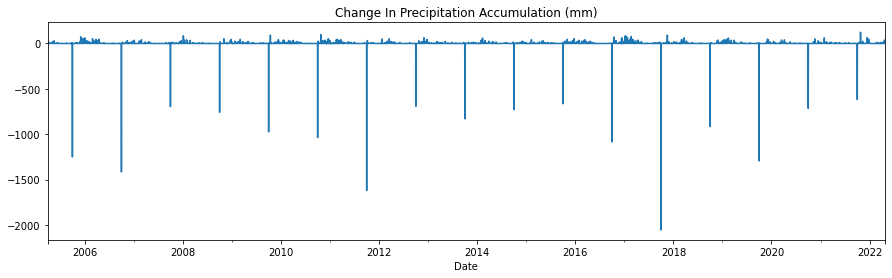

In [24]:
for data_name in avg_df.columns:
    plt.figure()
    avg_df[data_name].plot.line(figsize=(15,4))
    plt.title(data_name)

In [43]:
avg_df = avg_df.drop(['Snow Water Equivalent (mm) Start of Day Values', 'Precipitation Accumulation (mm) Start of Day Values', 'Change In Precipitation Accumulation (mm)'], axis=1)

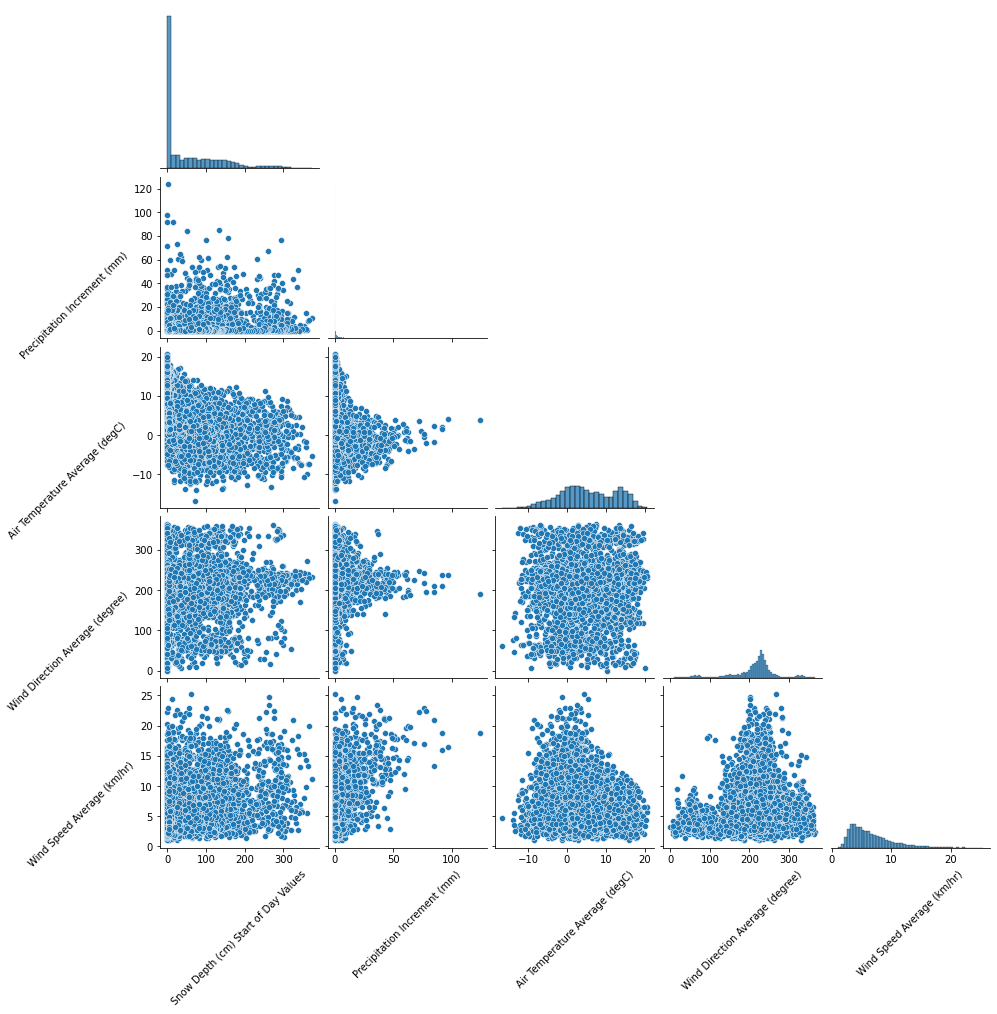

In [44]:
g = sns.pairplot(avg_df, corner=True)
for ax in g.axes.flatten():
    if ax is None:
        continue
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

In [45]:
sd = dfs['Snow Depth (cm) Start of Day Values']
_sd = sd.subtract(sd.average, axis=0).drop(['average'], axis=1)
_sd = _sd.reset_index()
stations = _sd.columns
_sd['year'] = _sd['Date'].dt.year.astype(str)
_sd = pd.melt(_sd, id_vars=['Date', 'year'], value_vars=stations)
_sd = _sd.set_index('Date')

In [46]:
_sd.head()

,year,Station Id,value
Date,,,
2005-04-01,2005,1049,47.800000
2005-04-02,2005,1049,43.933333
2005-04-03,2005,1049,44.933333
2005-04-04,2005,1049,53.800000
2005-04-05,2005,1049,50.933333


In [47]:
sd_byyear = _sd.groupby('year')
def plot_year(df):
    df.drop('year', axis=1).pivot(columns='Station Id', values='value').plot.line(figsize=(15,10))

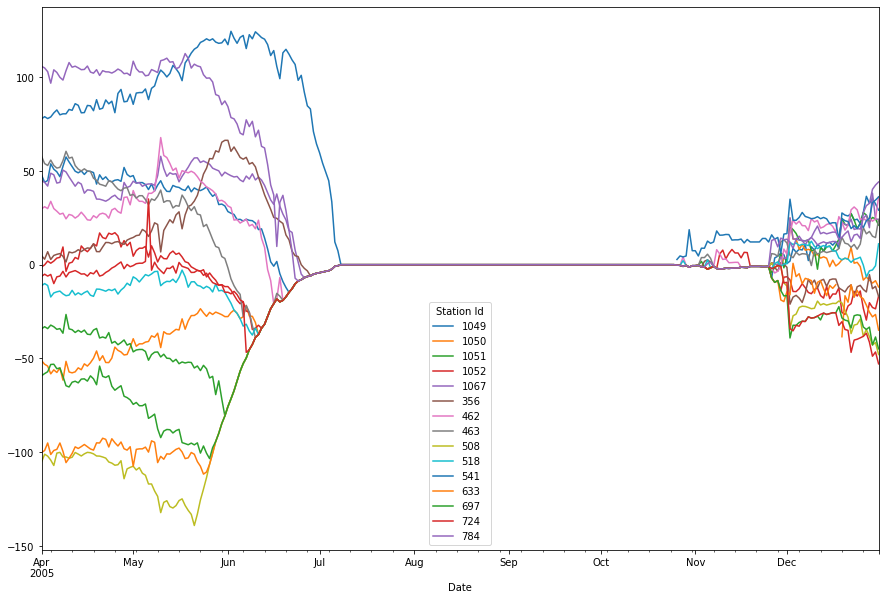

In [48]:
plot_year(sd_byyear.get_group('2005'))   

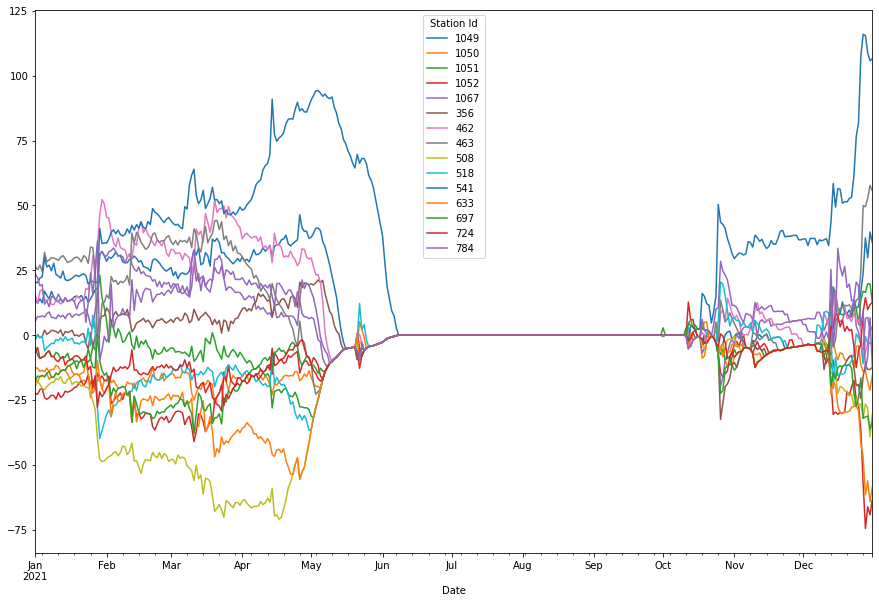

In [49]:
plot_year(sd_byyear.get_group('2021'))   

In [50]:
# df[~df['Wind Speed Average (km/hr)'].isna()].groupby('Station Name').get_group('Independence Lake')['Wind Speed Average (km/hr)'].plot.line()

In [52]:
# plt.scatter(avg_df['Precipitation Increment (mm)'].rolling(7).mean(), avg_df['Snow Water Equivalent (mm) Start of Day Values'].diff())